# From this notebook we will learn two things 
# how to deal with messing values 
# how to deal with wrong datatyopes 

In [1]:
import numpy as np
import pandas as pd 
import warnings 

import time
import datetime
warnings.filterwarnings(action='ignore')
from sklearn import preprocessing

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso

from sklearn import metrics
from sklearn.metrics import accuracy_score, mean_squared_error,mean_absolute_error,r2_score

In [2]:
data_path = r'C:\Users\Saman\Desktop\data cleanning\googleplaystore.csv'
df_orig = pd.read_csv(data_path)
df_orig.shape

(10841, 13)

In [3]:
df_orig.head(150)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Dictionary - Merriam-Webster,BOOKS_AND_REFERENCE,4.5,454060,Varies with device,"10,000,000+",Free,0,Everyone,Books & Reference,"May 18, 2018",Varies with device,Varies with device
146,NOOK: Read eBooks & Magazines,BOOKS_AND_REFERENCE,4.5,155446,Varies with device,"10,000,000+",Free,0,Teen,Books & Reference,"April 25, 2018",Varies with device,Varies with device
147,Free Panda Radio Music,BOOKS_AND_REFERENCE,4.5,418,4.2M,"100,000+",Free,0,Everyone,Books & Reference,"March 27, 2018",2.1,4.1 and up
148,Book store,BOOKS_AND_REFERENCE,4.4,22486,5.4M,"1,000,000+",Free,0,Teen,Books & Reference,"June 6, 2018",3.2.1,4.0 and up


In [4]:
df_orig.tail(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df_orig.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


messing value treatment 

In [7]:
df_orig.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

Handling missing value for rating 
  Rating is target variable 

In [8]:
print("Precentage of null records in Rating Column:{:.2f} %".format(df_orig.Rating.isnull().sum()/df_orig.shape[0]*100))

Precentage of null records in Rating Column:13.60 %


In [9]:
# Drop the records with null in rating 
df = df_orig[~(df_orig.Rating.isnull())]
df.shape

(9367, 13)

In [10]:
df = df_orig.dropna(subset=['Rating'])
df.shape

(9367, 13)

In [11]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [12]:
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
# Drop the shifted record 
df = df[~((df['Android Ver'].isnull()) & (df.Category == '1.9'))]
df.shape

(9366, 13)

In [14]:
# check the nulls in the android version column again
df[df['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11M,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2.1M,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


# imputing missing values 
### For numerical variables use mean And median
### For categorical use mode

In [15]:
df['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [16]:
df['Android Ver'].mode()

0    4.1 and up
dtype: object

In [17]:
#fill the null values in android version column with mode(most repated one )
df['Android Ver'] = df['Android Ver'].fillna(df['Android Ver'].mode()[0])

In [18]:
df['Android Ver'].value_counts()

4.1 and up            2061
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
5.0 - 8.0                2
1.0 and up               2
4.0.3 - 7.1.1            2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [19]:
print(df.shape)
df.isnull().sum()

(9366, 13)


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [20]:
# check the nulls in the Current version column again
df[df['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [21]:
df['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
5.11.0                   1
1.2.100                  1
3.4.0.10                 1
1.8.91                   1
4.5.6                    1
Name: Current Ver, Length: 2638, dtype: int64

In [22]:
df['Current Ver'].mode()[0]

'Varies with device'

In [23]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [24]:
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].mode()[0])

In [25]:
df['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
5.11.0                   1
1.2.100                  1
3.4.0.10                 1
1.8.91                   1
4.5.6                    1
Name: Current Ver, Length: 2638, dtype: int64

In [26]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [27]:
df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   object 
 4   Size            9366 non-null   object 
 5   Installs        9366 non-null   object 
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   object 
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


# The following Types are of object dtype while they should numirical:
    Reviews (Should be integer )
    size ( should be Float)
    Installs (should be Integer )
    Price (Shloud be Float)

In [28]:
df.Price.value_counts(ascending=True )

$19.40       1
$4.29        1
$1.59        1
$3.04        1
$37.99       1
          ... 
$1.99       59
$4.99       70
$0.99      107
$2.99      114
0         8719
Name: Price, Length: 73, dtype: int64

In [29]:
# check that all non-zero values in price column start with '$'
df.Price.shape[0] == df.Price.astype(str).str.startswith('$').sum() + df.Price[df.Price == '0'].count()

# here i got a error wirh .str i solved it by .astype(str)

True

In [30]:
# Get rid of '$' and change the type to float64
df.Price = df.Price.astype(str).apply(lambda x :float(x.replace('$' , '')))

In [31]:
print(df.Price.dtype)
df.describe()

float64


,Rating,Price
count,9366.000000,9366.000000
mean,4.191757,0.960928
std,0.515219,15.816585
min,1.000000,0.000000
25%,4.000000,0.000000
50%,4.300000,0.000000
75%,4.500000,0.000000
max,5.000000,400.000000


In [32]:
# check Reviews column
df.Reviews.value_counts()

2          83
3          78
5          74
4          74
1          67
           ..
275843      1
666521      1
1295606     1
8122        1
15750       1
Name: Reviews, Length: 5992, dtype: int64

In [33]:
# make sure all values are digit
df.Reviews.str.isdigit().sum() == df.Reviews.shape[0]


True

In [34]:
# change dtype of reviews column to int64
df.Reviews = df.Reviews.astype('int64')

In [35]:
print(df.Reviews.dtype)
df.describe()

int64


,Rating,Reviews,Price
count,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,0.960928
std,0.515219,3.144042e+06,15.816585
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,0.000000
50%,4.300000,5.930500e+03,0.000000
75%,4.500000,8.153275e+04,0.000000
max,5.000000,7.815831e+07,400.000000


In [36]:
# check installs column 
df.Installs.value_counts()

1,000,000+        1577
10,000,000+       1252
100,000+          1150
10,000+           1010
5,000,000+         752
1,000+             713
500,000+           538
50,000+            467
5,000+             432
100,000,000+       409
100+               309
50,000,000+        289
500+               201
500,000,000+        72
10+                 69
1,000,000,000+      58
50+                 56
5+                   9
1+                   3
Name: Installs, dtype: int64

In [37]:
# get rid of '+' &  ',' and change the type to int64
df.Installs = df.Installs.apply(lambda x : int(x.replace(',', '').replace('+','')))

In [38]:
# generate descriptive statistics cross-verify
print(df.Installs.dtype)
df.describe()

int64


,Rating,Reviews,Installs,Price
count,9366.000000,9.366000e+03,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,1.789744e+07,0.960928
std,0.515219,3.144042e+06,9.123822e+07,15.816585
min,1.000000,1.000000e+00,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,5.000000e+06,0.000000
max,5.000000,7.815831e+07,1.000000e+09,400.000000


In [39]:
# check size column 
df.Size.value_counts()

Varies with device    1637
14M                    166
12M                    161
11M                    160
15M                    159
                      ... 
280k                     1
93k                      1
899k                     1
676k                     1
879k                     1
Name: Size, Length: 414, dtype: int64

In [40]:
# Define function to fix size - convert all to KB
def fix_size(x):
    if x[-1] == 'M':
        x= float(x[:-1])*10**3
    elif x[-1] == 'K':
        x=float(x[:-1])
    else:
        x = None # varies with device replaced with null
    return x

In [41]:
# fix size column 
df.Size = df.Size.apply(lambda x : fix_size(x))
df.Size.dtype

dtype('float64')

In [42]:
# percentage of null records in column size to total number of records 
print('percentage of null records in column size: {:.2f}'.format(df.Size.isnull().sum()/df.shape[0]*100) )

percentage of null records in column size: 20.23


In [43]:
# check mean value for size column 
round(df.Size.mean(),0)

23736.0

In [44]:
# impute the null values in size column with mean value
df.Size = df.Size.fillna(round(df.Size.mean(),0))

In [45]:
df.Size.value_counts()

23736.0    1895
14000.0     166
12000.0     161
11000.0     160
15000.0     159
           ... 
84000.0       9
65000.0       9
86000.0       8
90000.0       5
1000.0        4
Name: Size, Length: 182, dtype: int64

In [46]:
# generate descriptive statistics cross-verify
print(df.Installs.dtype)
df.describe()

int64


,Rating,Reviews,Size,Installs,Price
count,9366.000000,9.366000e+03,9366.000000,9.366000e+03,9366.000000
mean,4.191757,5.140498e+05,23735.663037,1.789744e+07,0.960928
std,0.515219,3.144042e+06,20955.628469,9.123822e+07,15.816585
min,1.000000,1.000000e+00,1000.000000,1.000000e+00,0.000000
25%,4.000000,1.862500e+02,7500.000000,1.000000e+04,0.000000
50%,4.300000,5.930500e+03,23000.000000,5.000000e+05,0.000000
75%,4.500000,8.153275e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [47]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [48]:
# generate descriptive statistics cross-verify
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9366 non-null   object 
 1   Category        9366 non-null   object 
 2   Rating          9366 non-null   float64
 3   Reviews         9366 non-null   int64  
 4   Size            9366 non-null   float64
 5   Installs        9366 non-null   int64  
 6   Type            9366 non-null   object 
 7   Price           9366 non-null   float64
 8   Content Rating  9366 non-null   object 
 9   Genres          9366 non-null   object 
 10  Last Updated    9366 non-null   object 
 11  Current Ver     9366 non-null   object 
 12  Android Ver     9366 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


# Sanity Checks 
### The data that we needs to make sense and therefor you can perform certain santiyon them to ensure 
### they are factully correct as well. some sanity chacks can be:
    Reting is between 1 & 5 for all apps
    Number of reviews lessthan or equal to install 
    Free apps should not have Price greater than 0

In [49]:
# Performe sanity chack on Price column 
df.Rating.describe()

count    9366.000000
mean        4.191757
std         0.515219
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [50]:
# Performe sanity chack on Reviews column
df[df.Reviews > df.Installs].shape

(7, 13)

In [51]:
df[df.Reviews > df.Installs]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,23736.0,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.0,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.0,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [52]:
# drop this records 
df = df[df.Reviews <= df.Installs]
df.shape

(9359, 13)

In [53]:
# Performe sanity chack on Free apps 
df[df.Type == 'Free'].Price.value_counts()

0.0    8715
Name: Price, dtype: int64

# Outliers analysis using boxplot

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9359.000000,9.359000e+03,9359.000000,9.359000e+03,9359.000000
mean,4.191174,5.144332e+05,23741.231328,1.791083e+07,0.961116
std,0.514966,3.145187e+06,20961.449095,9.127102e+07,15.822478
min,1.000000,1.000000e+00,1000.000000,5.000000e+00,0.000000
25%,4.000000,1.870000e+02,7500.000000,1.000000e+04,0.000000
50%,4.300000,5.960000e+03,23000.000000,5.000000e+05,0.000000
75%,4.500000,8.164100e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


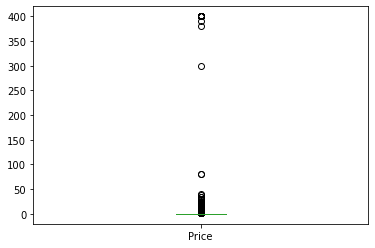

In [56]:
# create box plot for price column using pandas dataframe
df.Price.plot.box()
plt.show()

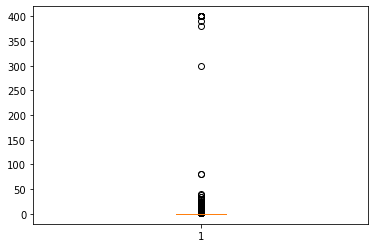

In [57]:
# create box plot for price column using matplotlib
plt.boxplot(df.Price)
plt.show()

In [58]:
# check the apps price with more than 100
df[df.Price > 100]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,23736.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [59]:
# lets remove the outlier > 100
df = df[df.Price <= 100]
df.shape

(9344, 13)

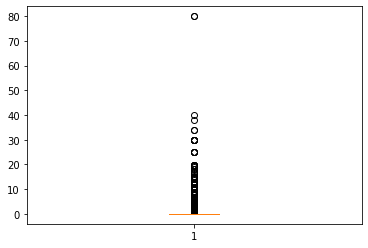

In [60]:
plt.boxplot(df.Price)
plt.show()

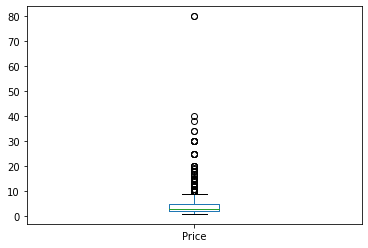

In [61]:
# lets plot price column for paid apps
df[df.Price > 0].Price.plot.box()
plt.show()

In [62]:
# check the apps with more than > 10 
df[df.Price > 10]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2251,Human Anatomy Atlas 2018: Complete 3D Human Body,MEDICAL,4.5,2921,25000.0,100000,Paid,24.99,Everyone,Medical,"May 25, 2018",2018.5.47,5.0 and up
2252,Essential Anatomy 3,MEDICAL,4.1,1533,42000.0,50000,Paid,11.99,Mature 17+,Medical,"August 7, 2014",1.1.3,4.0.3 and up
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2254,EMT Review Plus,MEDICAL,4.5,199,1800.0,10000,Paid,11.99,Everyone,Medical,"June 27, 2018",3.0.5,4.4W and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3800.0,1000,Paid,16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
2261,Block Buddy,MEDICAL,4.0,15,5000.0,1000,Paid,14.99,Everyone,Medical,"August 1, 2018",7.6.14,4.0 and up
2266,EMT PASS,MEDICAL,3.4,51,2400.0,1000,Paid,29.99,Everyone,Medical,"October 22, 2014",2.0.2,4.0 and up
2269,"Cardiac diagnosis (heart rate, arrhythmia)",MEDICAL,4.4,8,6500.0,100,Paid,12.99,Everyone,Medical,"July 25, 2018",7,3.0 and up
2272,AnatomyMapp,MEDICAL,4.1,80,48000.0,5000,Paid,14.99,Everyone,Medical,"November 5, 2013",1.0,3.0 and up
2277,"Muscle Premium - Human Anatomy, Kinesiology, B...",MEDICAL,4.2,168,25000.0,10000,Paid,24.99,Everyone,Medical,"August 11, 2017",7.1.17,4.4 and up


In [63]:
# can we drop records price > 10 
df[df.Price > 10].describe()

,Rating,Reviews,Size,Installs,Price
count,55.000000,55.000000,55.000000,55.000000,55.000000
mean,4.229091,1052.454545,23704.436364,17047.818182,21.678909
std,0.471276,2027.782568,22279.077588,31946.719109,13.612267
min,2.900000,1.000000,1100.000000,10.000000,10.990000
25%,4.000000,16.000000,4850.000000,1000.000000,14.495000
50%,4.300000,80.000000,23000.000000,1000.000000,16.990000
75%,4.600000,996.000000,31500.000000,10000.000000,24.990000
max,5.000000,8450.000000,100000.000000,100000.000000,79.990000


In [64]:
# can we drop records price <= 10 
df[df.Price <= 10].describe()

,Rating,Reviews,Size,Installs,Price
count,9289.000000,9.289000e+03,9289.000000,9.289000e+03,9289.000000
mean,4.191474,5.183027e+05,23762.956615,1.804568e+07,0.208083
std,0.515267,3.156699e+06,20959.621446,9.160104e+07,0.972313
min,1.000000,1.000000e+00,1000.000000,5.000000e+00,0.000000
25%,4.000000,1.940000e+02,7600.000000,1.000000e+04,0.000000
50%,4.300000,6.148000e+03,23000.000000,5.000000e+05,0.000000
75%,4.500000,8.348800e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,10.000000


In [65]:
# we decide to get rid of there outlier as well
df =df[df.Price <= 10]
df.shape

(9289, 13)

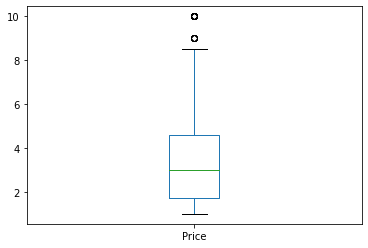

In [66]:
                                                                                # lets plot price column for paid apps
df[df.Price > 0].Price.plot.box()
plt.show()

# Histogram 

In [67]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,9289.000000,9.289000e+03,9289.000000,9.289000e+03,9289.000000
mean,4.191474,5.183027e+05,23762.956615,1.804568e+07,0.208083
std,0.515267,3.156699e+06,20959.621446,9.160104e+07,0.972313
min,1.000000,1.000000e+00,1000.000000,5.000000e+00,0.000000
25%,4.000000,1.940000e+02,7600.000000,1.000000e+04,0.000000
50%,4.300000,6.148000e+03,23000.000000,5.000000e+05,0.000000
75%,4.500000,8.348800e+04,27000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,10.000000


In [68]:
df.Reviews.value_counts()


2         81
3         78
5         74
4         72
1         65
          ..
10158      1
4011       1
1962       1
38824      1
315390     1
Name: Reviews, Length: 5977, dtype: int64

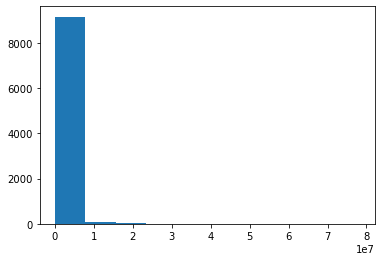

In [69]:
# create histogram for Reviews 
plt.hist(df.Reviews);

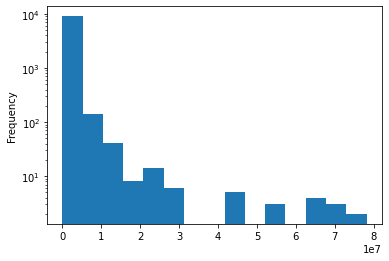

In [70]:
# change number of bins and log scale 
df.Reviews.plot.hist( bins = 15 ,log=True);

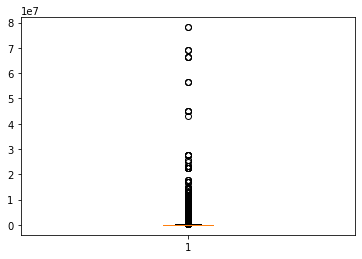

In [71]:
plt.boxplot(df.Reviews);

In [72]:
# lets check apps with more than 1M reviews
df[df.Reviews >= 1000000].sort_values('Reviews')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1671,Kick the Buddy,GAME,4.3,1000417,23736.0,50000000,Free,0.0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
1760,Kick the Buddy,GAME,4.3,1000417,23736.0,50000000,Free,0.0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
194,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002861,35000.0,100000000,Free,0.0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
1929,Kick the Buddy,GAME,4.3,1003269,23736.0,50000000,Free,0.0,Teen,Action,"July 5, 2018",Varies with device,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672,23736.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,23736.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,23736.0,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208,23736.0,1000000000,Free,0.0,Teen,Social,"August 3, 2018",Varies with device,Varies with device


In [73]:
# since the above records belong to famous application already, lets drop them 
df = df[df.Reviews < 1000000]
df.shape

(8585, 13)

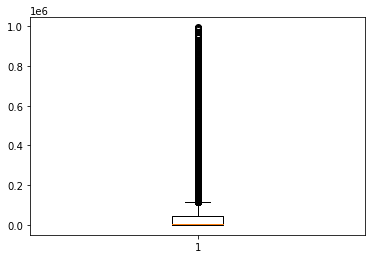

In [74]:
plt.boxplot(df.Reviews);

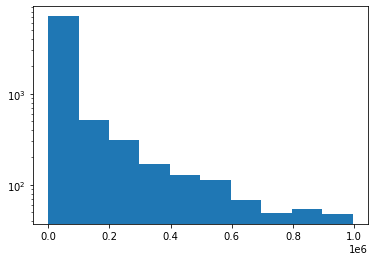

In [75]:
plt.hist(df.Reviews , log=True);

In [76]:
# check Installs column statistics again 
df.Installs.describe()

count    8.585000e+03
mean     4.312905e+06
std      2.872633e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [77]:
df.Installs.value_counts()

1000000       1577
10000000      1177
100000        1143
10000          994
5000000        752
1000           688
500000         538
50000          462
5000           426
100            302
500            199
50000000       138
10              64
50              56
100000000       51
5                8
1000000000       5
500000000        5
Name: Installs, dtype: int64

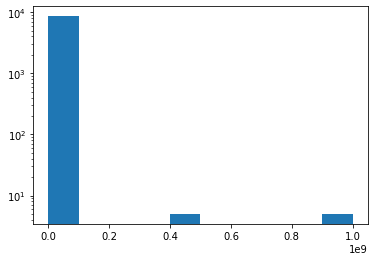

In [78]:
plt.hist(df.Installs , log=True);

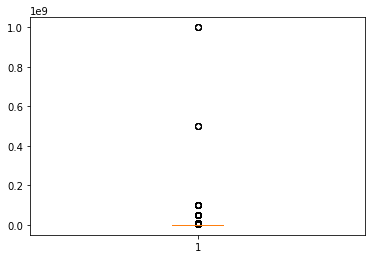

In [79]:
plt.boxplot(df.Installs);

In [80]:
df.Installs.describe()

count    8.585000e+03
mean     4.312905e+06
std      2.872633e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [81]:
# lets drop values > 100M 
df = df[df.Installs <= 100000000]
df.shape

(8575, 13)

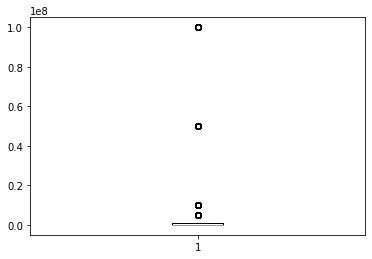

In [82]:
plt.boxplot(df.Installs);

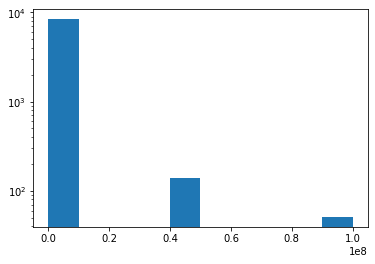

In [83]:
plt.hist(df.Installs , log= True);

In [84]:
df = df[df.Installs <= 20000000]
df.shape

(8386, 13)

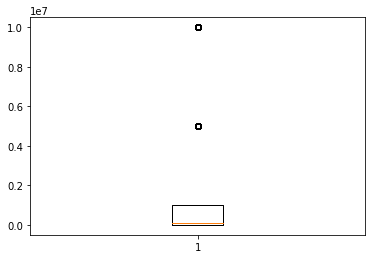

In [85]:
plt.boxplot(df.Installs);

In [86]:
# lets check size column
df.Size.describe()

count      8386.000000
mean      22575.118054
std       20443.980471
min        1000.000000
25%        6800.000000
50%       20000.000000
75%       26000.000000
max      100000.000000
Name: Size, dtype: float64

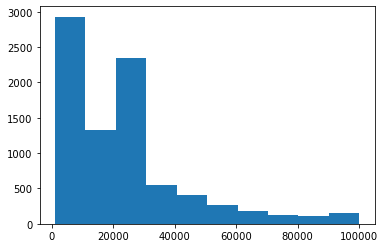

In [87]:
plt.hist(df.Size);

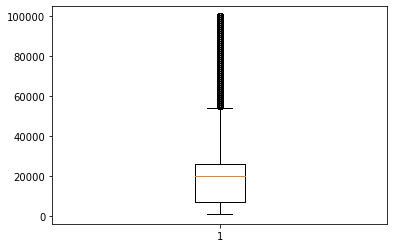

In [88]:
plt.boxplot(df.Size);

here we see that there is few outliers so we can escape it

# Data Visualisation with Seaborn 

In [89]:
import seaborn as sn

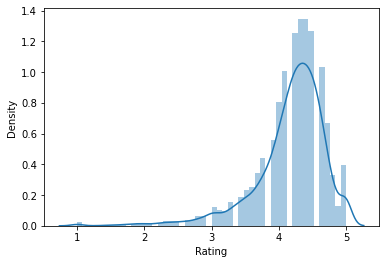

In [90]:
sn.distplot(df.Rating);

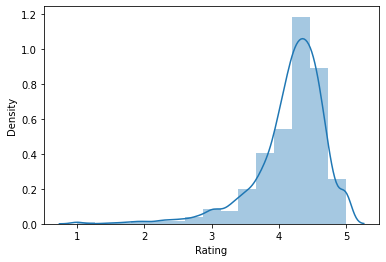

In [91]:
sn.distplot(df.Rating , bins = 15);

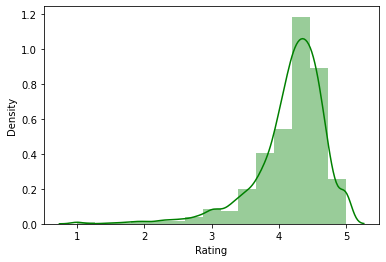

In [92]:
sn.distplot(df.Rating , bins = 15 , color = 'g');

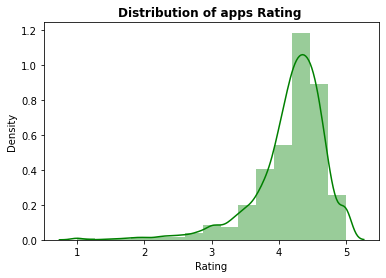

In [93]:
# Apply matplotlib functionlities 
sn.distplot(df.Rating , bins = 15 , color = 'g')
plt.title('Distribution of apps Rating ' , fontsize =12 , fontweight='bold')
plt.show()

In [94]:
# check all styling options 
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

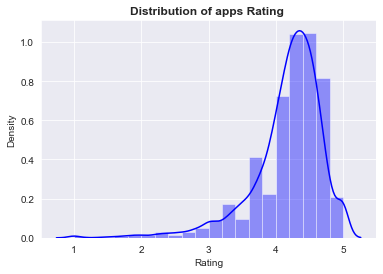

In [95]:
sn.set_style('darkgrid')
sn.distplot(df.Rating , bins = 20 , color = 'b')
plt.title('Distribution of apps Rating ' , fontsize =12 , fontweight='bold')
plt.show()

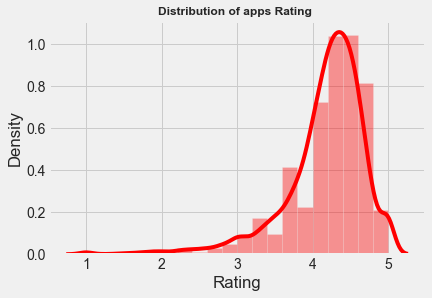

In [96]:
plt.style.use('fivethirtyeight')
sn.distplot(df.Rating , bins = 20 , color = 'r')
plt.title('Distribution of apps Rating ' , fontsize =12 , fontweight='bold')
plt.show()

In [97]:
plt.style.use('default')

# Pie-chart and Bar-chart

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8386 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8386 non-null   object 
 1   Category        8386 non-null   object 
 2   Rating          8386 non-null   float64
 3   Reviews         8386 non-null   int64  
 4   Size            8386 non-null   float64
 5   Installs        8386 non-null   int64  
 6   Type            8386 non-null   object 
 7   Price           8386 non-null   float64
 8   Content Rating  8386 non-null   object 
 9   Genres          8386 non-null   object 
 10  Last Updated    8386 non-null   object 
 11  Current Ver     8386 non-null   object 
 12  Android Ver     8386 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 917.2+ KB


In [99]:
df.reset_index(drop=True , inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8386 entries, 0 to 8385
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             8386 non-null   object 
 1   Category        8386 non-null   object 
 2   Rating          8386 non-null   float64
 3   Reviews         8386 non-null   int64  
 4   Size            8386 non-null   float64
 5   Installs        8386 non-null   int64  
 6   Type            8386 non-null   object 
 7   Price           8386 non-null   float64
 8   Content Rating  8386 non-null   object 
 9   Genres          8386 non-null   object 
 10  Last Updated    8386 non-null   object 
 11  Current Ver     8386 non-null   object 
 12  Android Ver     8386 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 851.8+ KB


In [100]:
df['Content Rating'].value_counts()

Everyone           6743
Teen                895
Mature 17+          414
Everyone 10+        330
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

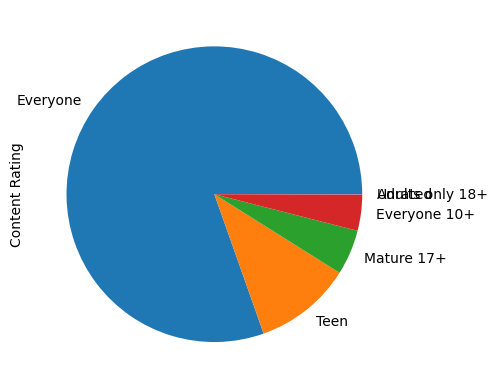

In [101]:
df['Content Rating'].value_counts().plot.pie();

<BarContainer object of 1 artists>

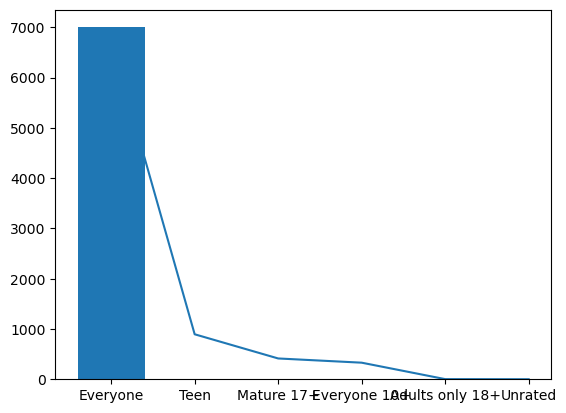

In [102]:
df['Content Rating'].value_counts().plot().bar('Content Rating' , 7000)

In [103]:
df= df[~(df['Content Rating']).isin(['Adults only 18+' , 'Unrated'])]
df['Content Rating'].value_counts()

Everyone        6743
Teen             895
Mature 17+       414
Everyone 10+     330
Name: Content Rating, dtype: int64

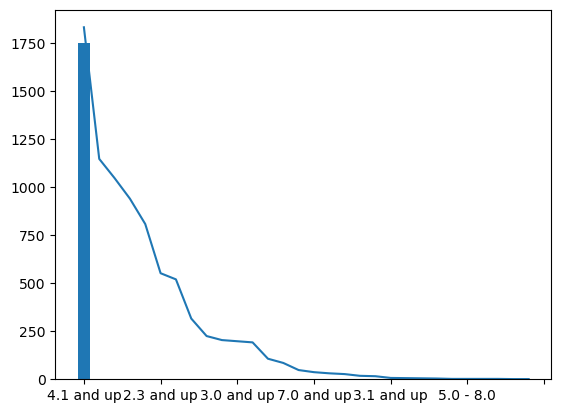

In [104]:
df['Android Ver'].value_counts().plot().bar('Android Ver' , 1750);

# Scatter Plots

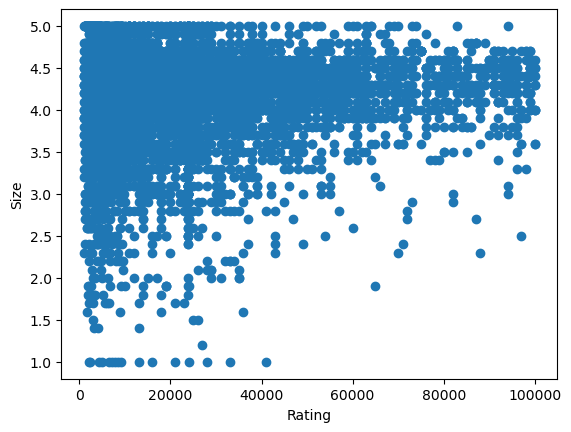

In [105]:
plt.scatter(df.Size , df.Rating)
plt.ylabel('Size')
plt.xlabel('Rating')
plt.show()

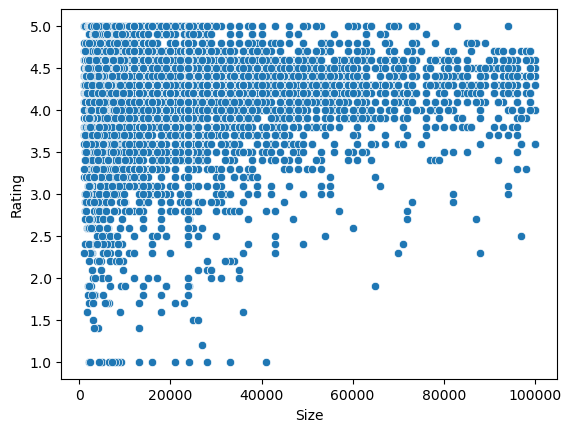

In [106]:
sn.scatterplot(df.Size , df.Rating)
plt.show()


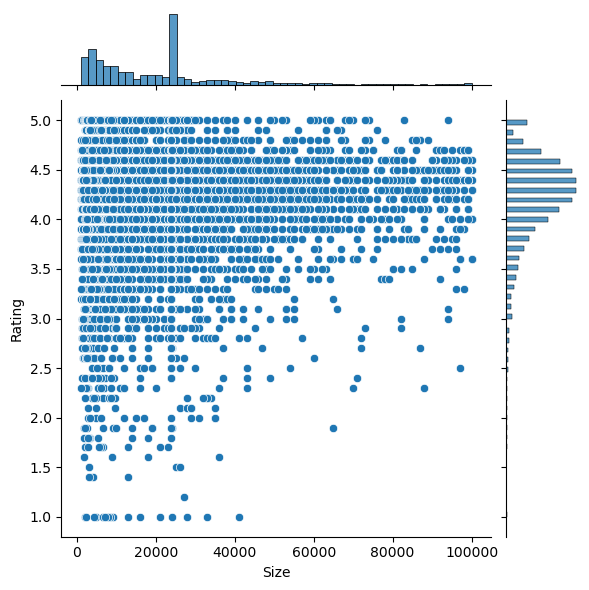

In [107]:
sn.jointplot(df.Size , df.Rating)
plt.show()

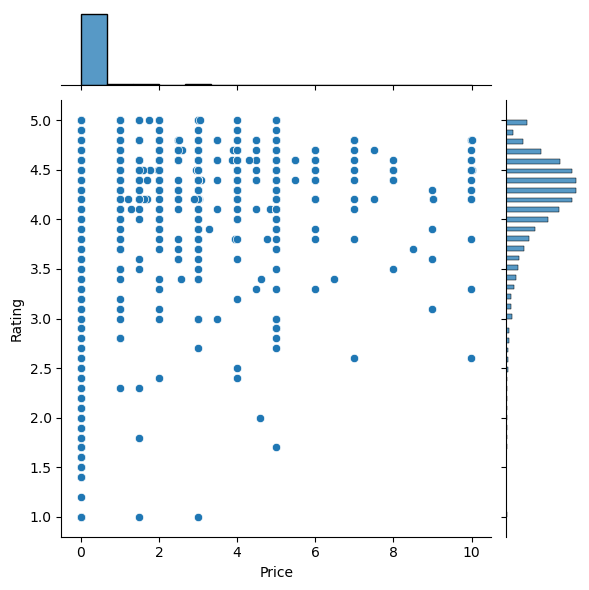

In [108]:
sn.jointplot(df.Price , df.Rating)
plt.show()

# Regression  Plots 

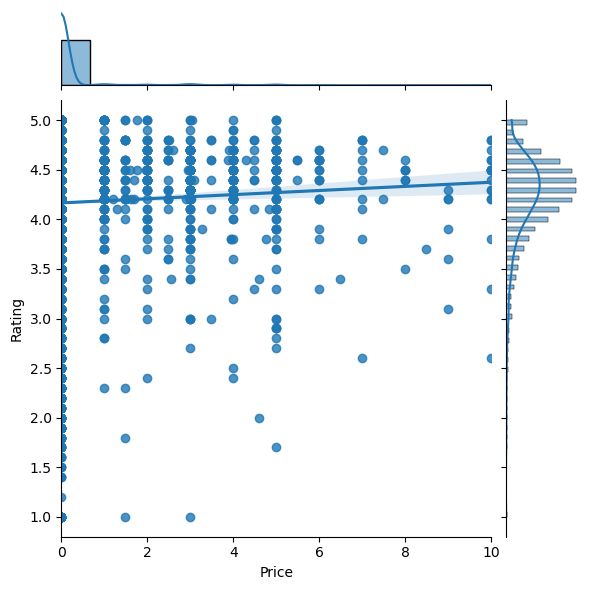

In [109]:
sn.jointplot(df.Price , df.Rating , kind='reg') # reg = regression 
plt.show()

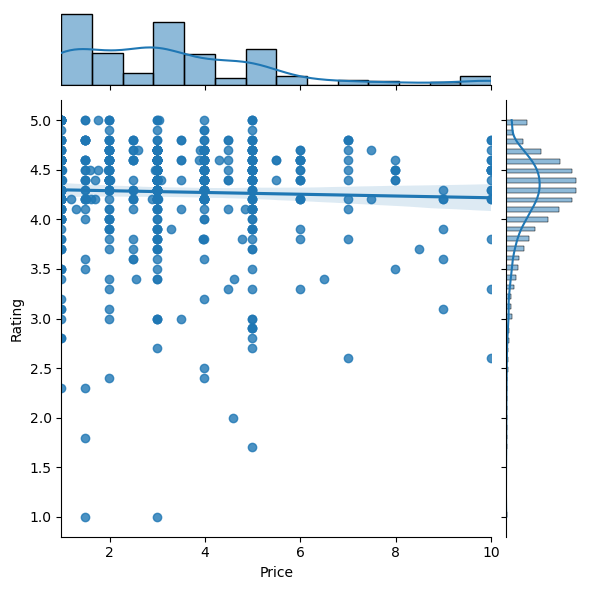

In [110]:
sn.jointplot(df[df.Price > 0].Price , df.Rating , kind='reg')
plt.show()

# Pair Plots 

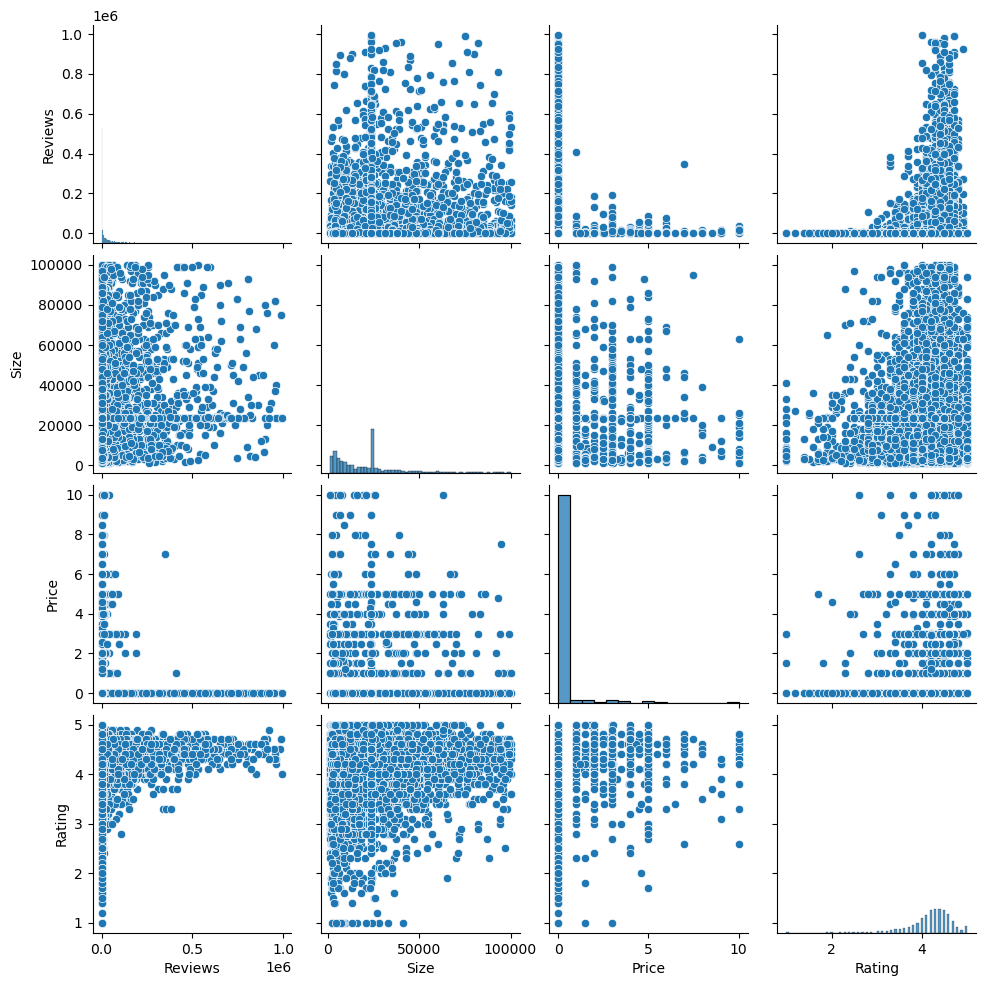

In [111]:
sn.pairplot(df[['Reviews' , 'Size' , 'Price' , 'Rating']])
plt.show()

# Bar plots 

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

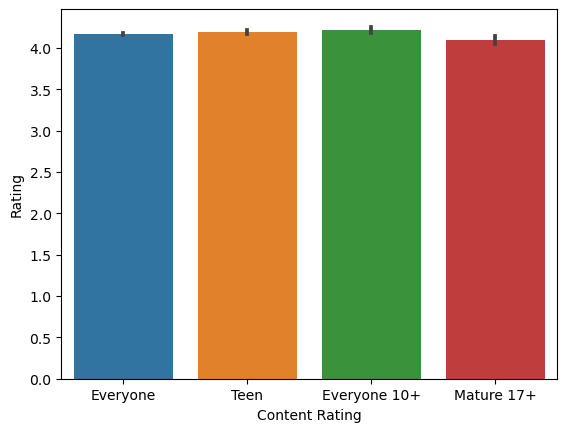

In [112]:
sn.barplot(x=df['Content Rating' ] , y=df.Rating )

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

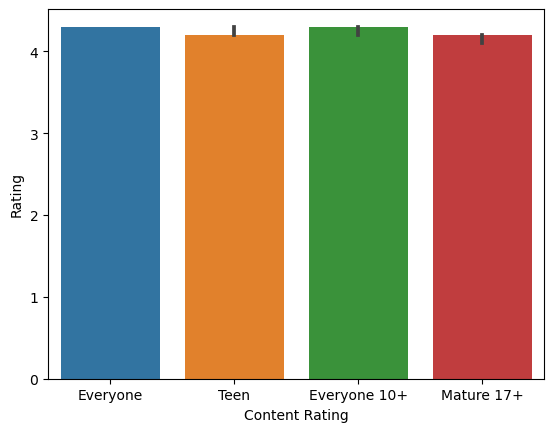

In [113]:
sn.barplot(x=df['Content Rating' ] , y=df.Rating  , estimator = np.median)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

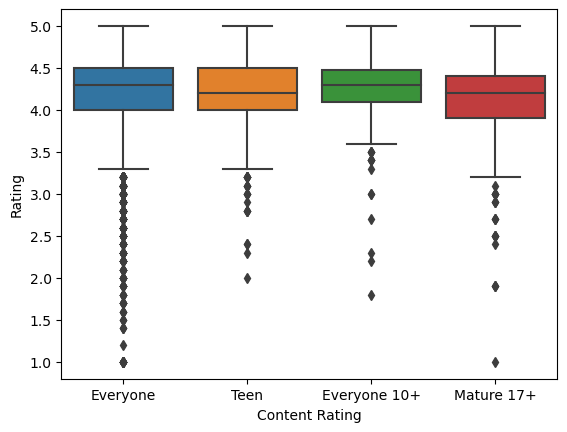

In [114]:
sn.boxplot(x=df['Content Rating' ] , y=df.Rating )

In [115]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [116]:
df.Installs.value_counts()

1000000     1576
10000000    1177
100000      1143
10000        994
5000000      752
1000         688
500000       536
50000        461
5000         426
100          302
500          199
10            64
50            56
5              8
Name: Installs, dtype: int64

# Feature Selection

In [117]:
df = df.drop('Android Ver' , axis=1)

In [118]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4
3,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1
4,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0


# New Update

## building machine learning model

In [119]:
# Last Updated encoding
date_format= '%B %d, %Y'
df['Last Updated'] = df['Last Updated'].apply(lambda x : time.mktime(datetime.datetime.strptime(x,date_format).timetuple()))

In [120]:
# Lets convert all the versions in the format number.number to simplify the data
# We have to clean all non numerical values & unicode charachters 
import re

replaces = [u'\u00AE', u'\u2013', u'\u00C3', u'\u00E3', u'\u00B3', '[', ']', "'"]
for i in replaces:
    df['Current Ver']=df['Current Ver'].astype(str).apply(lambda x : x.replace(i, ''))

regex = [r'[-+|/:/;(_)@]', r'\s+', r'[A-Za-z]+']
for j in regex:
    df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : re.sub(j, '0', x))

df['Current Ver'] = df['Current Ver'].astype(str).apply(lambda x : x.replace('.', ',',1).replace('.', '').replace(',', '.',1)).astype(float)
df['Current Ver'] = df['Current Ver'].fillna(df['Current Ver'].median())

In [121]:
# Genres features encoding

LE = preprocessing.LabelEncoder()
df['Genres'] = LE.fit_transform(df['Genres'])

In [122]:
LE = preprocessing.LabelEncoder()
df['Content Rating'] = LE.fit_transform(df['Content Rating'])

In [123]:
# Type encoding

df['Type'] = pd.get_dummies(df['Type'])

In [124]:
# Category features encoding

CategoryList = df['Category'].unique().tolist() 
CategoryList = ['cat_' + word for word in CategoryList]
df = pd.concat([df, pd.get_dummies(df['Category'], prefix='cat')], axis=1)

In [125]:
# App values encoding

LE = preprocessing.LabelEncoder()
df['App'] = LE.fit_transform(df['App'])

In [126]:
# features = ['App','Reviews', 'Size', 'Installs','Type', 'Price', 'Content Rating', 'Genres']
features = ['App', 'Reviews', 'Size', 'Installs', 'Rating', 'Price', 'Content Rating', 'Genres', 'Current Ver']

In [127]:
features.extend(CategoryList)

In [128]:
X = df[features]
y = df['Type']

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=10)

### Decision Tree Regression

In [130]:
from sklearn import tree

In [131]:
clf = tree.DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5, random_state=42)

In [132]:
clf.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mae', max_depth=5, min_samples_leaf=5,
                      random_state=42)

In [133]:
accuracy = clf.score(X_test, y_test)
accuracy

1.0

## Random Forest Regression Model


In [134]:
model = RandomForestRegressor(n_estimators = 200, n_jobs=-1, random_state=10)

In [135]:
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=10)

In [136]:
acc = model.score(X_test, y_test)
acc

1.0

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8382 entries, 0 to 8385
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   App                      8382 non-null   int32  
 1   Category                 8382 non-null   object 
 2   Rating                   8382 non-null   float64
 3   Reviews                  8382 non-null   int64  
 4   Size                     8382 non-null   float64
 5   Installs                 8382 non-null   int64  
 6   Type                     8382 non-null   uint8  
 7   Price                    8382 non-null   float64
 8   Content Rating           8382 non-null   int32  
 9   Genres                   8382 non-null   int32  
 10  Last Updated             8382 non-null   float64
 11  Current Ver              8382 non-null   float64
 12  cat_ART_AND_DESIGN       8382 non-null   uint8  
 13  cat_AUTO_AND_VEHICLES    8382 non-null   uint8  
 14  cat_BEAUTY              

# KNeighbors

In [141]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
mean_squared_error(y_test, knn_y_pred)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, knn_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, knn_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred)))

Mean Absolute Error: 0.10560636182902586
Mean Squared Error: 0.05735984095427435
Root Mean Squared Error: 0.23949914604080397


# Random forest

In [139]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)
mean_squared_error(y_test, rf_y_pred)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, rf_y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


# Pre ML

#### We will predict a new app's rating based on its 
#### Category, Size, Type, Price, Content Rating, Genres. 
#### Some features like Installs, Reviews, Last Update cannot be used 
#### because these data only can be collected after the app is on the martket. 
#### That means at the time we predict, we dont have those data. 
#### This problem is also known as data leakage.

#### Basically in this ML section, I am going to fit the default model and try to tune the Hyperparameters to get better results

In [138]:
# All Libraries we need 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler 

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Rating', axis = 1), df['Rating'], random_state = 101)

In [141]:
# We should normalize after split to avoid data leakage

In [142]:
sc = MinMaxScaler()

sc.fit(X_train)

X_train_sc =sc.transform(X_train)
X_test_sc = sc.transform(X_test)
X_train_sc_df = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_test_sc_df = pd.DataFrame(X_test_sc, columns = X_test.columns)

ValueError: could not convert string to float: 'FAMILY'

In [143]:
stc = StandardScaler()
stc.fit(X_train)
X_train_stc =stc.transform(X_train)
X_test_stc = stc.transform(X_test)
X_train_stc_df = pd.DataFrame(X_train_stc, columns = X_train.columns)
X_test_stc_df = pd.DataFrame(X_test_stc, columns = X_test.columns)

ValueError: could not convert string to float: 'FAMILY'

In [144]:
X_train_sc_df

NameError: name 'X_train_sc_df' is not defined

## Linear Regression

In [145]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred = linear_reg.predict(X_test)
mean_squared_error(y_test, y_pred)

ValueError: could not convert string to float: 'FAMILY'

In [165]:
linear_reg.fit(X_train_stc_df, y_train)
y_pred = linear_reg.predict(X_test_stc_df)
linear_error = mean_squared_error(y_test, y_pred)
linear_error

NameError: name 'X_train_stc_df' is not defined

## XGBoost

In [147]:
model = XGBRegressor()
model.fit(X_train, y_train, 
             early_stopping_rounds=10, 
             eval_set=[(X_test, y_test)],
             verbose=False)
y_pred = model.predict(X_test)
mean_squared_error(y_pred, y_test)

0.2958100162631418

In [148]:
model


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [149]:
from sklearn.model_selection import GridSearchCV 

In [150]:
param_grid = {
    'max_depth': [3,4,5],
    'learning_rate': [0.1, 0.15],
    'gamma': [0,0.25, 0.5],
    'reg_lambda': [0,1,2],
    'scale_pos_weight': [0,1, 2]}
"""
param_grid = {
    'max_depth': [3],
    'learning_rate': [0.1],
    'gamma': [0, 0.25],
    'reg_lambda': [1, 1.5],
    'scale_pos_weight': [0.5, 1]} """
"""    
param_grid = {
    'max_depth': [7,8],
    'learning_rate': [0.01, 0.05, 0.1 ],
    'gamma': [0.25, 0.5, 1],
    'reg_lambda': [5, 6, 7],
    'scale_pos_weight': [3]} """

"    \nparam_grid = {\n    'max_depth': [7,8],\n    'learning_rate': [0.01, 0.05, 0.1 ],\n    'gamma': [0.25, 0.5, 1],\n    'reg_lambda': [5, 6, 7],\n    'scale_pos_weight': [3]} "

In [151]:
"""optimal_params = GridSearchCV(
    estimator=xgb.XGBRegressor(seed=40, subsample = 0.9, colsample_bytree=0.5),
    param_grid=param_grid,
    scoring = 'neg_mean_squared_error',
    verbose = 0,
    n_jobs = 10,
    cv=3
)

optimal_params.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds= 10, verbose = 0)
print(optimal_params.best_params_)"""

"optimal_params = GridSearchCV(\n    estimator=xgb.XGBRegressor(seed=40, subsample = 0.9, colsample_bytree=0.5),\n    param_grid=param_grid,\n    scoring = 'neg_mean_squared_error',\n    verbose = 0,\n    n_jobs = 10,\n    cv=3\n)\n\noptimal_params.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds= 10, verbose = 0)\nprint(optimal_params.best_params_)"

###### {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 3, 'reg_lambda': 2, 'scale_pos_weight': 0} this is what I got.

###### But seems like the model with these parameters is overfitted.

###### So I decide to manually change them to get a better result on test set

In [152]:
xgb_reg = XGBRegressor(learning_rate=0.1, gamma= 0.25, max_depth= 3, scale_pos_weight=1, reg_lambda= 1)
xgb_reg.fit(X_train, y_train, 
             early_stopping_rounds=10, 
             eval_set=[(X_test, y_test)],
             verbose=False)
y_pred = xgb_reg.predict(X_test)
xgb_error = mean_squared_error(y_test,y_pred)
xgb_error

0.2964499797654915

## Random forest



In [153]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)
mean_squared_error(y_test, rf_y_pred)

0.3536294252212017

In [154]:
RandomForestRegressor()

RandomForestRegressor()

In [155]:
param_grid = {

    'max_depth': [7,8],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [3],
    'n_estimators': [300,400]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 0)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 400}


In [156]:
rf_reg = RandomForestRegressor(max_depth= 7, min_samples_leaf= 3, min_samples_split= 3, n_estimators= 300)
rf_reg.fit(X_train, y_train)
rf_y_pred = rf_reg.predict(X_test)
rf_error = mean_squared_error(y_test,rf_y_pred)
rf_error

0.2932313734558449

## Support Vector Machine

In [157]:
from sklearn import svm
svm_reg = svm.SVR()
svm_reg.fit(X_train, y_train)
svm_y_pred = svm_reg.predict(X_test)
mean_squared_error(y_test, svm_y_pred)

0.31717634067510675

In [158]:
svm_reg.fit(X_train_sc_df, y_train)
svm_y_pred = svm_reg.predict(X_test_sc_df)
mean_squared_error(y_test, svm_y_pred)

0.3093027047545452

In [159]:
svm_reg

SVR()

In [160]:
param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

grid = GridSearchCV(svm_reg, param_grid=param_grid, cv=3, n_jobs = -1)
grid.fit(X_train_sc_df, y_train)
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'poly'}


In [161]:
svm_b = grid.predict(X_test_sc_df)
svm_error = mean_squared_error(y_test, svm_b)
svm_error

0.3068064651278903

## KNeighbors

In [162]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=20)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)
mean_squared_error(y_test, knn_y_pred)

0.3119095896946565

#### How to select K in sklearn's KNeighborsClassifier based on the highest accuracy

In [163]:
from sklearn.neighbors import KNeighborsRegressor
#k_range = range(1, 50)

k =50

k_range = np.arange(1,k+1,1)
# We can create Python dictionary using [] or dict()
scores = []
acc_array=np.zeros(k)
# We use a loop through the range 1 to 26

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    svm_y_pred = knn.predict(X_test)
    # We append the scores in the dictionary for plot
    scores.append(mean_squared_error(y_test, svm_y_pred))
    acc = mean_squared_error(y_test, svm_y_pred)
    acc = -acc
    acc_array[k-1]=acc # store correctly the results

print(min(scores))

0.30503496035769184


In [164]:
max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print("The best accuracy was with", abs(max_acc), "with k=", k+1)

The best accuracy was with 0.30503496035769184 with k= 48


In [165]:
acc_list_for_plt = abs(acc_array)

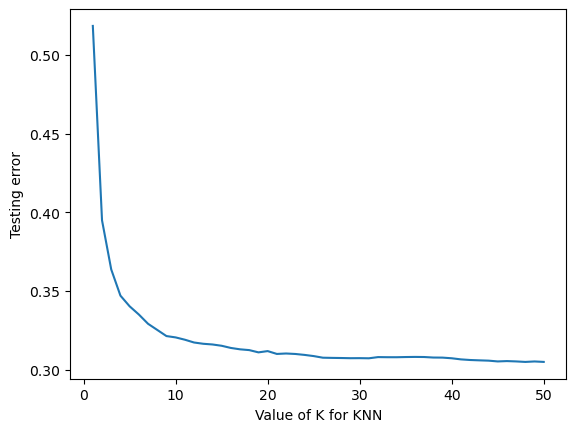

In [166]:
plt.plot(k_range, acc_list_for_plt)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing error')
plt.show()

In [167]:
k =50

k_range = np.arange(1,k+1,1)
# We can create Python dictionary using [] or dict()
scores = []
acc_array=np.zeros(k)
# We use a loop through the range 1 to 26

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_sc_df, y_train)
    svm_y_pred = knn.predict(X_test_sc_df)
    # We append the scores in the dictionary for plot
    scores.append(mean_squared_error(y_test, svm_y_pred))
    acc = mean_squared_error(y_test, svm_y_pred)
    acc = -acc
    acc_array[k-1]=acc # store correctly the results

print(min(scores))
knn_error = min(scores)

max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print("The best accuracy was with",abs(max_acc),"with k=", k+1)

0.2937952251908397
The best accuracy was with 0.2937952251908397 with k= 50
